In [1]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors


In [2]:
# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

# DATASET ON HOUSEHOLD

In [9]:

file_url = r"C:\Users\Lenovo\Documents\Ironhack\PROJET INDIA FINAL 11FEV\HOUSEHOLDCEREALNSS682.csv"

data= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
data = data.copy()
data.head(2)

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Round_Centre_code,FSU_Serial_no,Round,Sch_no,Sample,Sector,State_region,District,Stratum,Sub_Stratum_No,Schedule_type,Sub_Round,Sub_Sample,FOD_Sub_Region,Hamlet_Group_Sub_Stratum_No,Second_Stage_Stratum_No,Sample_hhld_no,Level,Filler,HH_Size,NIC_2008,NCO_2004,HH_Type,Religion,Social_Group,whether_Land_owned,Type_of_land_owned,Land_owned,Land_Leased_in,otherwise_Land_possessed,Land_Leased_out,Land_total_possessed,During_july10_june11_cultivated,During_july10_june11_irrigated,Special_Characters_for_Ok_Stamp,Blank,NSS,NSC,MLT,HHID,State_code,District_code,HH_Type_code,Combined_multiplier,Subsample_multiplier
0,2,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,2,0,5,Tea/coffee shops,Directors and Chief Executives,2.0,Christianity,Scheduled Tribes,Yes,Homestead and other land,136,,,,136,62,,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,Non-agriculture,"324,08","648,16"
1,2,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,2,2,0,2,Manufacture of country liquor,Directors and Chief Executives,2.0,Christianity,Scheduled Tribes,Yes,Homestead and other land,66,,,,66,45,,NaN,NaN,2,4,64816,715581202,MEGHALAYA,West Garo Hills,Non-agriculture,"324,08","648,16"


In [5]:
data.shape

(101662, 45)

In [6]:
data.columns

Index(['Round_Centre_code', 'FSU_Serial_no', 'Round', 'Sch_no', 'Sample',
       'Sector', 'State_region', 'District', 'Stratum', 'Sub_Stratum_No',
       'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region',
       'Hamlet_Group_Sub_Stratum_No', 'Second_Stage_Stratum_No',
       'Sample_hhld_no', 'Level', 'Filler', 'HH_Size', 'NIC_2008', 'NCO_2004',
       'HH_Type', 'Religion', 'Social_Group', 'whether_Land_owned',
       'Type_of_land_owned', 'Land_owned', 'Land_Leased_in',
       'otherwise_Land_possessed', 'Land_Leased_out', 'Land_total_possessed',
       'During_july10_june11_cultivated', 'During_july10_june11_irrigated',
       'Special_Characters_for_Ok_Stamp', 'Blank', 'NSS', 'NSC', 'MLT', 'HHID',
       'State_code', 'District_code', 'HH_Type_code', 'Combined_multiplier',
       'Subsample_multiplier'],
      dtype='object')

In [10]:
data=data[['HHID', 'Sector', 'HH_Size', 
        'Religion', 'Social_Group', 'whether_Land_owned', 
       'State_code']]

In [11]:
#OTHER INFO ON HOUSHOLD
file_url = r"C:\Users\Lenovo\Documents\Ironhack\PROJET INDIA FINAL 11FEV\OTHERINFOHOUSHOLDNSS68.csv"

data2= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
data2 = data2.copy()
data2.head(2)

,Round_Centre_code,FSU_Serial_no,Round,Sch_no,Sample,Sector,State_region,District,Stratum,Sub_Stratum_No,Schedule_type,Sub_Round,Sub_Sample,FOD_Sub_Region,Hamlet_Group_Sub_Stratum_No,Second_Stage_Stratum_No,Sample_hhld_no,Level,Filler,Cooking_Code,Lighting_Code,Dwelling_unit_Code,Regular_salary_earner,Perform_Ceremony,Meals_served_to_non_hhld_members,Possess_ration_card,type_of_ration_card,MPCE_URP,MPCE_MRP,Special_Characters_for_Ok_Stamp,Blank,NSS,NSC,MLT,HHID,State_code,District_code,Combined_multiplier,Subsample_multiplier
0,3,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,3,0,firewood and chips,kerosene,owned,no,no,0.0,yes,Others,118900,119468,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,"324,08","648,16"
1,3,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,2,3,0,firewood and chips,kerosene,owned,no,no,0.0,yes,BPL,220700,223878,NaN,NaN,2,4,64816,715581202,MEGHALAYA,West Garo Hills,"324,08","648,16"


In [12]:
data2.shape

(101662, 39)

In [13]:
data2.columns

Index(['Round_Centre_code', 'FSU_Serial_no', 'Round', 'Sch_no', 'Sample',
       'Sector', 'State_region', 'District', 'Stratum', 'Sub_Stratum_No',
       'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region',
       'Hamlet_Group_Sub_Stratum_No', 'Second_Stage_Stratum_No',
       'Sample_hhld_no', 'Level', 'Filler', 'Cooking_Code', 'Lighting_Code',
       'Dwelling_unit_Code', 'Regular_salary_earner', 'Perform_Ceremony',
       'Meals_served_to_non_hhld_members', 'Possess_ration_card',
       'type_of_ration_card', 'MPCE_URP', 'MPCE_MRP',
       'Special_Characters_for_Ok_Stamp', 'Blank', 'NSS', 'NSC', 'MLT', 'HHID',
       'State_code', 'District_code', 'Combined_multiplier',
       'Subsample_multiplier'],
      dtype='object')

In [14]:
data2=data2[['HHID', 'Regular_salary_earner',
        'Possess_ration_card', 'MPCE_MRP',]]
#MPCE= MONTHLY PER CAPITAL EXPENDITURE
data2

,HHID,Regular_salary_earner,Possess_ration_card,MPCE_MRP
0,715581201,no,yes,119468
1,715581202,no,yes,223878
2,715581203,no,yes,198586
3,715581204,no,yes,355752
4,715581301,no,yes,79006
...,...,...,...,...
101657,454191104,yes,yes,366464
101658,454191201,no,no,452463
101659,454191202,yes,yes,171808
101660,454191203,yes,yes,223069


In [15]:
#MERGE OF TWO DATASET ON HHID
house= pd.merge(data,data2, on = 'HHID')
house

,HHID,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP
0,715581201,rural,5,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,119468
1,715581202,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,223878
2,715581203,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,198586
3,715581204,rural,1,Islam,Scheduled Tribes,Yes,MEGHALAYA,no,yes,355752
4,715581301,rural,6,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,79006
...,...,...,...,...,...,...,...,...,...,...
101657,454191104,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,yes,yes,366464
101658,454191201,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,no,no,452463
101659,454191202,urban,6,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,171808
101660,454191203,urban,3,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,223069


In [16]:
house.shape

(101662, 10)

In [17]:
house.columns

Index(['HHID', 'Sector', 'HH_Size', 'Religion', 'Social_Group',
       'whether_Land_owned', 'State_code', 'Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP'],
      dtype='object')

In [18]:
house.isna().sum()

HHID                      0
Sector                    0
HH_Size                   0
Religion                  3
Social_Group             14
whether_Land_owned       10
State_code                0
Regular_salary_earner    12
Possess_ration_card      13
MPCE_MRP                  0
dtype: int64

In [19]:
house = house.dropna()

In [20]:
house.duplicated().any()

False

In [21]:
house.dtypes

HHID                      int64
Sector                   object
HH_Size                   int64
Religion                 object
Social_Group             object
whether_Land_owned       object
State_code               object
Regular_salary_earner    object
Possess_ration_card      object
MPCE_MRP                  int64
dtype: object

In [22]:
house.describe()

,HHID,HH_Size,MPCE_MRP
count,1.016110e+05,101611.000000,1.016110e+05
mean,6.265134e+08,4.573530,2.078569e+05
std,1.480089e+08,2.247328,2.107810e+05
min,4.100011e+08,1.000000,4.411000e+03
25%,4.652713e+08,3.000000,1.054290e+05
50%,7.179323e+08,4.000000,1.533900e+05
75%,7.537512e+08,6.000000,2.401095e+05
max,7.999823e+08,39.000000,9.425373e+06


<Figure size 720x432 with 0 Axes>

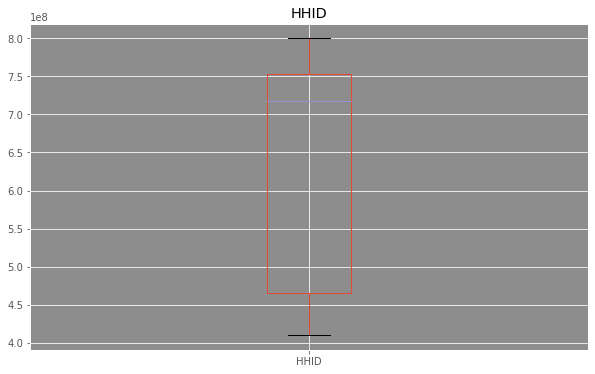

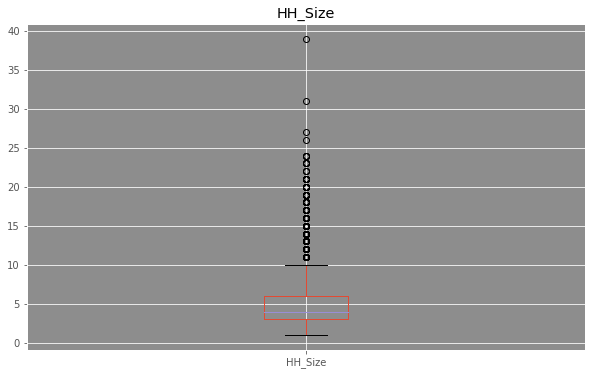

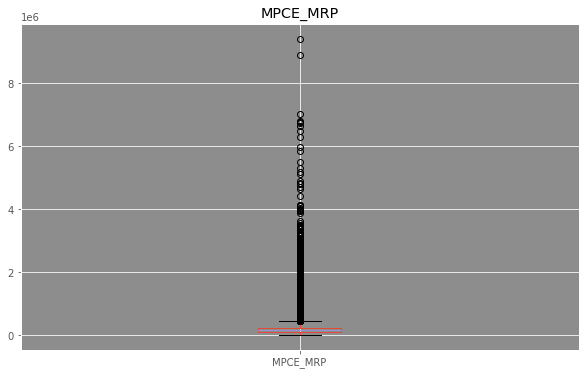

In [23]:
#Check Outliers
num_df = house.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    house.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [24]:
#we drop outliers 
house[(house['HH_Size'] >20)].shape
house[(house['MPCE_MRP'] >1000000)].shape




(923, 10)

In [25]:
house = house.drop(house[house['HH_Size'] >20].index)
house = house.drop(house[house['MPCE_MRP'] >1000000].index)

<Figure size 720x432 with 0 Axes>

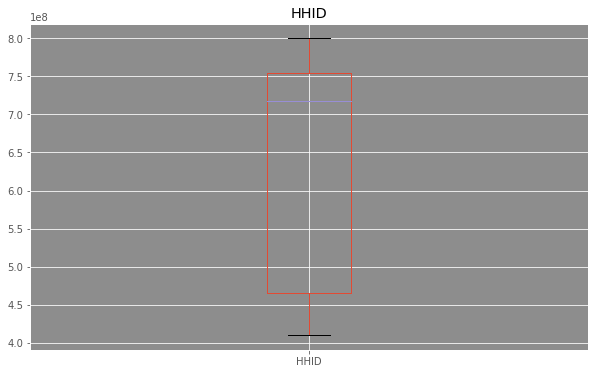

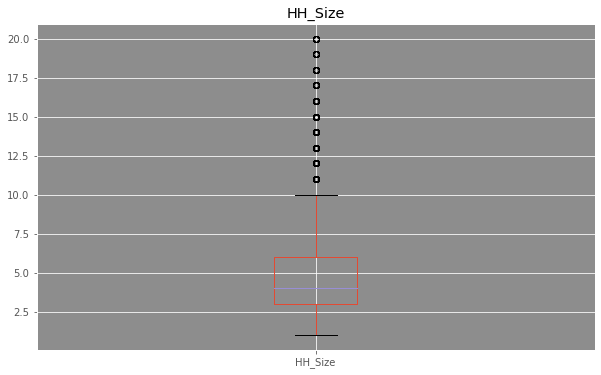

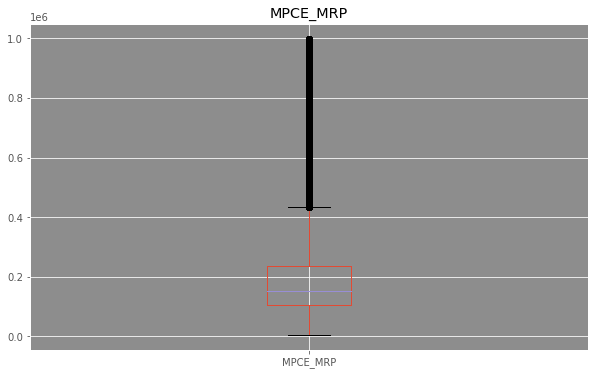

In [26]:
#Check again Outliers
num_df = house.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    house.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [27]:
house.shape

(100662, 10)

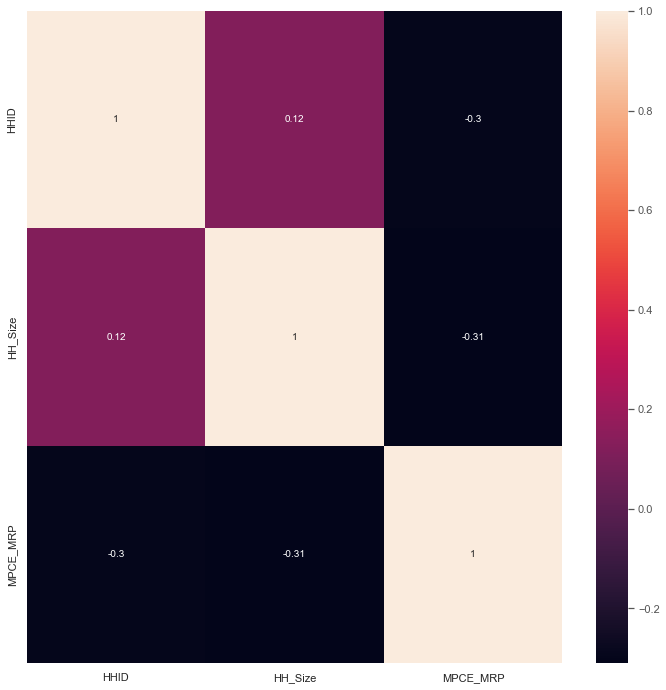

In [28]:
#check collinarity 
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(12,12))  
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)
ax =sns.heatmap(house.corr(), annot=True)

In [29]:
##Exporting File
file_url = r'C:\Users\Lenovo\Documents\INDE DATA\HOUSEHOLDNSS68CLEAN.csv'
house.to_csv(file_url,index = False)

# DATASET ON ALIMENTATION

In [ ]:

file_url = r"C:\Users\Lenovo\Documents\Ironhack\PROJET INDIA FINAL 11FEV\CEREALNSS68.csv"

cereal= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
cereal = cereal.copy()
cereal.head(3)

In [56]:
cereal.shape

(5763152, 35)

In [57]:
cereal.columns

Index(['Round_Centre_code', 'FSU_Serial_no', 'Round', 'Sch_no', 'Sample',
       'Sector', 'State_Region', 'District', 'Stratum', 'Sub_Stratum_No',
       'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region',
       'Hamlet_Group_Sub_Stratum_No', 'Second_Stage_Stratum_No',
       'Sample_Hhld_No', 'Level', 'Filler', 'Item_Code',
       'Home_Produce_Quantity', 'Home_Produce_Value',
       'Total_Consumption_Quantity', 'Total_Consumption_Value', 'Source_Code',
       'Special_Characters_for_Ok_Stamp', 'Blank', 'NSS', 'NSC', 'MLT', 'HHID',
       'State_Code', 'District_code', 'Combined_multiplier',
       'Subsample_multiplier'],
      dtype='object')

In [61]:
cereal=cereal[['HHID', 'Item_Code', 'Total_Consumption_Quantity',
 'Total_Consumption_Value' ]]

In [62]:
cereal['Item_Code'].unique()

array(['Rice-PDS(Kg)', 'Rice-other sources(Kg)', 'Muri(Kg)',
       'bread(bakery)(Kg)', 'Cereal(s.t)',
       'Cereal Substitute : tapioca etc.', 'masur(Kg)',
       'other pulse products(Kg)', 'Pulses and Pulse Products(s.t)',
       'milk : liquid(litre)', 'Milk & Milk Products : s.t (160-167)',
       'salt', 'sugar - PDS', 'sugar - other sources',
       'salt & sugar : s.t(170-175)', 'mustard oil(Kg)',
       'edible oil  : others', 'edible oil  : s.t.(180-185)', 'eggs(no)',
       'fish, prawn(Kg)', 'beef / buffalo meat(Kg)', 'pork(Kg)',
       'chicken(Kg)', 'Egg,Fish & meat : s.t (190-196)', 'potato(Kg)',
       'onion(Kg)', 'brinjal(Kg)', 'palak/other leafy vegetables(Kg)',
       'green chillies(Kg)', 'gourd, pumpkin(Kg)', 'beans, barbati(Kg)',
       'other vegetables(Kg)', 'vegetables  : s.t (Kg) (200-217)',
       'banana (no.)', 'coconut(no.)', 'guava(Kg)', 'pears/nashpati(Kg)',
       'fruits(fresh) : s.t.(220-238)', 'other nuts(Kg)',
       'fruits (dry) : s.t. (240-24

In [63]:
#We need to reduce number of items, each one will be a columns
#I keep sub total for vegetable/cereal/fruit/pulse
#but for non vege and alcool/intoxicant, I will keep items, because political issue
#I will add s.t. to the item, to use them in my filter s.t

#i delete fuel and light because it is not alimentation



In [64]:
cereal['Item_Code'].replace({'toddy (litre)': 'toddy (l.) s.t', 'country liquor (litre)': 'country liquor (l.) s.t', 
'beer (litre)':'beer (l.) s.t' , 'foreign/ refined liquor or wine (litre)': 'foreign/ refined liquor or wine (l.) s.t', 
'eggs(no)': 'eggs(no) s.t', 'fish, prawn(Kg)': 'fish, prawn(Kg) s.t', 'goat meat /mutton(Kg)': 'goat meat /mutton(Kg) s.t',
'beef / buffalo meat(Kg)': 'beef / buffalo meat(Kg) s.t', 'pork(Kg)': 'pork(Kg) s.t', 'chicken(Kg)': 'chicken(Kg) s.t'}, inplace=True)


In [65]:
#creation filter to have selected items
filter = cereal['Item_Code'].str.contains('s.t')
filter

0          False
1          False
2          False
3          False
4           True
           ...  
5763147    False
5763148    False
5763149    False
5763150    False
5763151     True
Name: Item_Code, Length: 5763152, dtype: bool

In [68]:
food = cereal[filter]
food = food.drop(food[food['Item_Code'] == 'fuel and light : s.t. (330-345)'].index)
food = food.drop(food[food['Item_Code'] == 'intoxicants : s.t.(320-325)'].index)
food = food.drop(food[food['Item_Code']== "Egg,Fish & meat : s.t (190-196)"].index)

food['Item_Code'].value_counts()

Cereal(s.t)                                 99895
salt & sugar : s.t(170-175)                 99875
vegetables  : s.t (Kg) (200-217)            99698
spices : s.t  (250-261)                     99452
edible oil  : s.t.(180-185)                 99261
beverages : s.t (270-277)                   98703
Pulses and Pulse Products(s.t)              98537
packaged processed food : s.t.(290-296)     90199
Milk & Milk Products : s.t (160-167)        88291
fruits(fresh) : s.t.(220-238)               85998
tobacco  : s.t. (310-317)                   50661
eggs(no) s.t                                44304
chicken(Kg) s.t                             41002
fruits (dry) : s.t. (240-247)               39322
fish, prawn(Kg) s.t                         37620
pan : s.t.(300-302)                         28411
goat meat /mutton(Kg) s.t                   16499
beef / buffalo meat(Kg) s.t                  9711
country liquor (l.) s.t                      8094
foreign/ refined liquor or wine (l.) s.t     5828


In [69]:
#rename columns
food['Item_Code'].replace({"beverages : s.t (270-277)": "coffee, tea, juice"}, inplace=True)


In [70]:
food['Item_Code'].value_counts()

Cereal(s.t)                                 99895
salt & sugar : s.t(170-175)                 99875
vegetables  : s.t (Kg) (200-217)            99698
spices : s.t  (250-261)                     99452
edible oil  : s.t.(180-185)                 99261
coffee, tea, juice                          98703
Pulses and Pulse Products(s.t)              98537
packaged processed food : s.t.(290-296)     90199
Milk & Milk Products : s.t (160-167)        88291
fruits(fresh) : s.t.(220-238)               85998
tobacco  : s.t. (310-317)                   50661
eggs(no) s.t                                44304
chicken(Kg) s.t                             41002
fruits (dry) : s.t. (240-247)               39322
fish, prawn(Kg) s.t                         37620
pan : s.t.(300-302)                         28411
goat meat /mutton(Kg) s.t                   16499
beef / buffalo meat(Kg) s.t                  9711
country liquor (l.) s.t                      8094
foreign/ refined liquor or wine (l.) s.t     5828


In [71]:
#RENAME VALUE IN COLUM
food['Item_Code']=food['Item_Code'].replace(to_replace=r's.t[^|]*$', value='', regex=True).str.strip('():')



In [72]:
#delete : #strip delete the element at the end
food['Item_Code']=food['Item_Code'].replace(to_replace=r's.t[^|]*$', value='', regex=True).str.strip(': ')

In [73]:
food['Item_Code'].unique()

array(['Cereal', 'Pulses and Pulse Products', 'Milk & Milk Products',
       'salt & sugar', 'edible oil', 'eggs(no)', 'fish, prawn(Kg)',
       'beef / buffalo meat(Kg)', 'pork(Kg)', 'chicken(Kg)', 'vegetables',
       'fruits(fresh)', 'fruits (dry)', 'spices', 'coffee, tea, juice',
       'packaged processed food', 'pan', 'tobacco', 'country liquor (l.)',
       'beer (l.)', 'foreign/ refined liquor or wine (l.)',
       'goat meat /mutton(Kg)', 'toddy (l.)'], dtype=object)

In [75]:
food.dtypes

HHID                           int64
Item_Code                     object
Total_Consumption_Quantity    object
Total_Consumption_Value        int64
dtype: object

# WE WILL KEEP QUANTITY 

In [77]:
food["Total_Consumption_Quantity"] = pd.to_numeric(food["Total_Consumption_Quantity"], errors='coerce')


In [76]:
#create colum to check the relation between quantity and value

food["Quantitybyvalue"]= food["Total_Consumption_Quantity"]/cereal['Total_Consumption_Value']
food

,HHID,Item_Code,Total_Consumption_Quantity,Total_Consumption_Value,Quantitybyvalue
4,715581201,Cereal,46500.0,750,62.000000
8,715581201,Pulses and Pulse Products,2500.0,120,20.833333
10,715581201,Milk & Milk Products,NaN,300,NaN
14,715581201,salt & sugar,5500.0,142,38.732394
17,715581201,edible oil,1000.0,90,11.111111
...,...,...,...,...,...
5763116,454191204,vegetables,NaN,306,NaN
5763123,454191204,fruits(fresh),NaN,193,NaN
5763135,454191204,spices,1850.0,180,10.277778
5763139,454191204,"coffee, tea, juice",NaN,448,NaN


In [78]:
y=food.loc[(food['Item_Code'] == 'Cereal') ]
y['Quantitybyvalue'].nunique()
#no relation between consuption quantity and value


49962

In [79]:
#check where are NullValue / cereate new columns with no value
food['Nonevalue'] = food['Total_Consumption_Quantity'].isnull().groupby([food['Item_Code']]).transform('sum').astype(int)
food


,HHID,Item_Code,Total_Consumption_Quantity,Total_Consumption_Value,Quantitybyvalue,Nonevalue
4,715581201,Cereal,46500.0,750,62.000000,0
8,715581201,Pulses and Pulse Products,2500.0,120,20.833333,0
10,715581201,Milk & Milk Products,NaN,300,NaN,88291
14,715581201,salt & sugar,5500.0,142,38.732394,0
17,715581201,edible oil,1000.0,90,11.111111,0
...,...,...,...,...,...,...
5763116,454191204,vegetables,NaN,306,NaN,99698
5763123,454191204,fruits(fresh),NaN,193,NaN,85998
5763135,454191204,spices,1850.0,180,10.277778,0
5763139,454191204,"coffee, tea, juice",NaN,448,NaN,98703


In [81]:
#check in with items where are the non-value
cerealnonvalue=food.groupby('Item_Code')['Nonevalue'].agg('sum')
cerealnonvalue.round()

Item_Code
Cereal                                  0.000000e+00
Milk & Milk Products                    7.795301e+09
Pulses and Pulse Products               0.000000e+00
beef / buffalo meat(Kg)                 0.000000e+00
beer (l.)                               0.000000e+00
chicken(Kg)                             0.000000e+00
coffee, tea, juice                      9.742282e+09
country liquor (l.)                     0.000000e+00
edible oil                              0.000000e+00
eggs(no)                                0.000000e+00
fish, prawn(Kg)                         0.000000e+00
foreign/ refined liquor or wine (l.)    0.000000e+00
fruits (dry)                            0.000000e+00
fruits(fresh)                           7.395656e+09
goat meat /mutton(Kg)                   0.000000e+00
packaged processed food                 8.135860e+09
pan                                     8.071849e+08
pork(Kg)                                0.000000e+00
salt & sugar                        

In [344]:
#compare with size of the non value
cereal['Item_Code'].value_counts()

Cereal                                  99890
salt & sugar                            99875
vegetables                              99698
spices                                  99452
edible oil                              99261
coffee, tea, juice                      98703
Pulses and Pulse Products               98537
packaged processed food                 90196
Milk & Milk Products                    88288
fruits(fresh)                           85998
tobacco                                 50661
eggs(no)                                44304
chicken(Kg)                             41002
fruits (dry)                            39321
fish, prawn(Kg)                         37620
pan                                     28411
goat meat /mutton(Kg)                   16498
beef / buffalo meat(Kg)                  9711
country liquor (l.)                      8094
foreign/ refined liquor or wine (l.)     5827
pork(Kg)                                 5566
beer (l.)                         

In [82]:
#beceause the missing data concerns items which are consumed by almost all household we drop 
food=food.dropna()

In [83]:
food.shape

(708657, 6)

<Figure size 720x432 with 0 Axes>

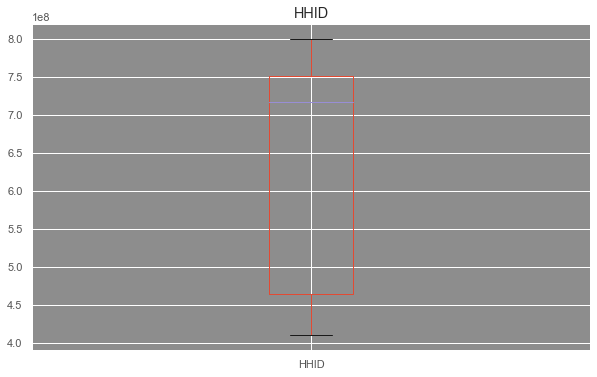

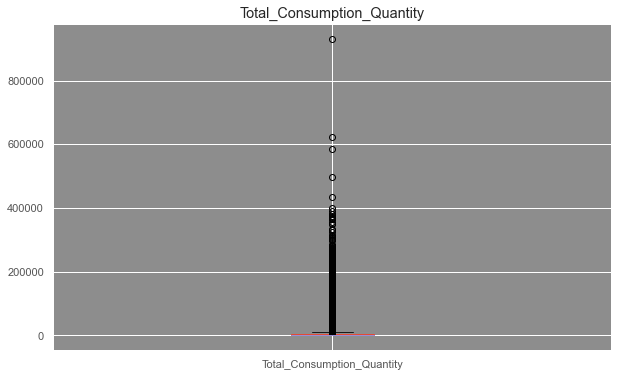

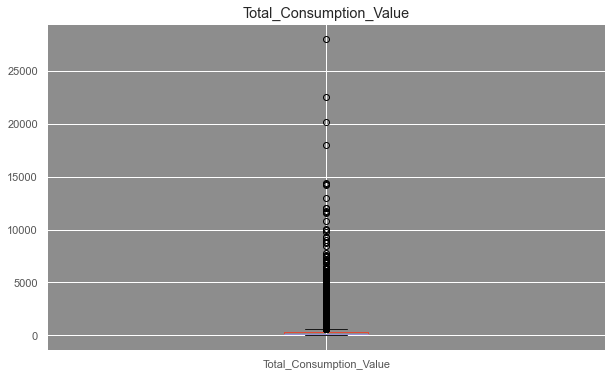

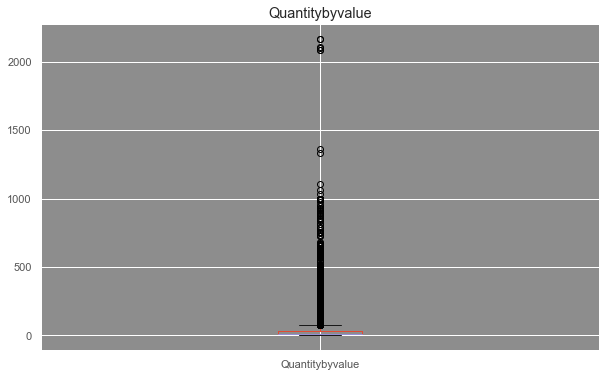

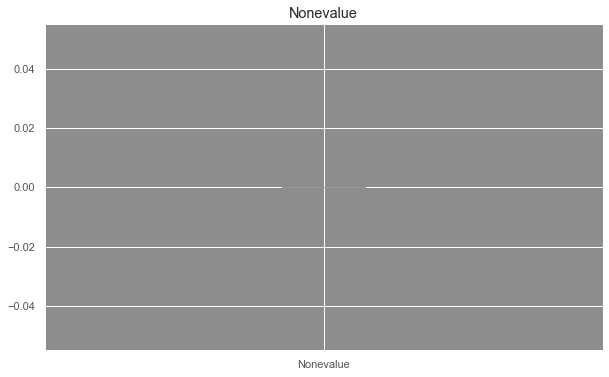

In [85]:
#Check Outliers
num_df = food.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    food.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [86]:
food = food.drop(food[food['Total_Consumption_Value'] >15000].index)
food.drop(columns=['Quantitybyvalue', 'Nonevalue'], inplace=True)

In [87]:
food.head()

,HHID,Item_Code,Total_Consumption_Quantity,Total_Consumption_Value
4,715581201,Cereal,46500.0,750
8,715581201,Pulses and Pulse Products,2500.0,120
14,715581201,salt & sugar,5500.0,142
17,715581201,edible oil,1000.0,90
18,715581201,eggs(no),8.0,24


In [89]:
##Exporting File
file_url2 = r'C:\Users\Lenovo\Documents\INDE DATA\FOODQUANTITYNSS68CLEAN.csv'
data.to_csv(file_url2,index = False)

# Merge the two dataset

In [395]:
house.shape

(99959, 10)

In [90]:
food.shape

(708653, 4)

### transformation of dataset food, to have items in columns, and unique ID 

In [94]:
foodpivot2= pd.pivot_table(food, values='Total_Consumption_Quantity', index=['HHID'], 
                    columns=['Item_Code'], aggfunc=np.sum, fill_value=None)
foodpivot2

Item_Code,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
HHID,,,,,,,,,,,,,,,,
410001101,41160.0,6750.0,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,NaN,500.0,3000.0,NaN,5000.0,1420.0,NaN
410001102,16300.0,4200.0,NaN,NaN,NaN,NaN,2500.0,6.0,NaN,NaN,1450.0,NaN,NaN,4900.0,1525.0,NaN
410001103,43330.0,5000.0,NaN,NaN,NaN,NaN,10000.0,24.0,NaN,NaN,1000.0,500.0,NaN,10000.0,3110.0,NaN
410001201,25600.0,6550.0,NaN,NaN,1000.0,NaN,3500.0,24.0,NaN,NaN,3250.0,1000.0,NaN,5500.0,1600.0,NaN
410001202,20900.0,3200.0,NaN,NaN,NaN,NaN,3000.0,20.0,NaN,NaN,500.0,NaN,NaN,4000.0,1750.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799981301,50000.0,3250.0,NaN,NaN,NaN,NaN,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,5800.0,500.0,NaN
799982101,65000.0,4000.0,NaN,NaN,NaN,NaN,2000.0,12.0,NaN,NaN,NaN,NaN,NaN,4000.0,750.0,NaN
799982201,85000.0,4000.0,NaN,NaN,1000.0,NaN,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,750.0,NaN


In [95]:
foodpivot2 = foodpivot2.reset_index()

In [96]:
foodpivot2.shape

(100310, 17)

In [98]:
## Check for duplicates
foodpivot2.duplicated().any()

False

In [99]:
foodpivot2.isna().sum()

Item_Code
HHID                                        0
Cereal                                    415
Pulses and Pulse Products                1773
beef / buffalo meat(Kg)                 90599
beer (l.)                               98117
chicken(Kg)                             59308
country liquor (l.)                     92216
edible oil                               1049
eggs(no)                                56006
fish, prawn(Kg)                         62690
foreign/ refined liquor or wine (l.)    94483
fruits (dry)                            60989
goat meat /mutton(Kg)                   83813
pork(Kg)                                94744
salt & sugar                              435
spices                                    858
toddy (l.)                              98812
dtype: int64

In [100]:
foodpivot2.dtypes

Item_Code
HHID                                      int64
Cereal                                  float64
Pulses and Pulse Products               float64
beef / buffalo meat(Kg)                 float64
beer (l.)                               float64
chicken(Kg)                             float64
country liquor (l.)                     float64
edible oil                              float64
eggs(no)                                float64
fish, prawn(Kg)                         float64
foreign/ refined liquor or wine (l.)    float64
fruits (dry)                            float64
goat meat /mutton(Kg)                   float64
pork(Kg)                                float64
salt & sugar                            float64
spices                                  float64
toddy (l.)                              float64
dtype: object

<Figure size 720x432 with 0 Axes>

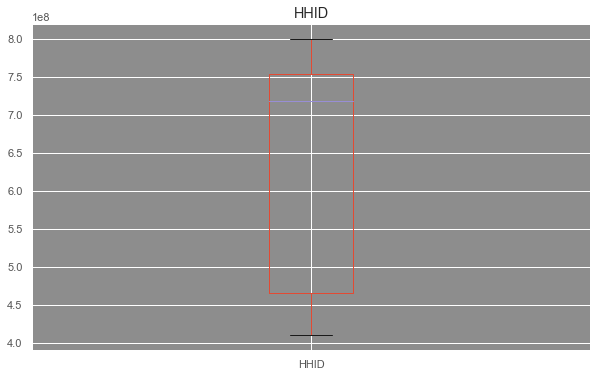

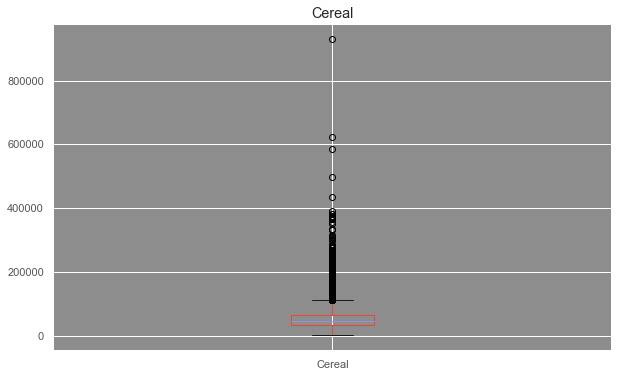

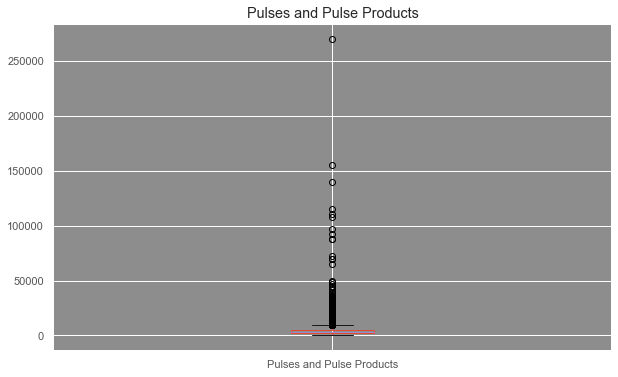

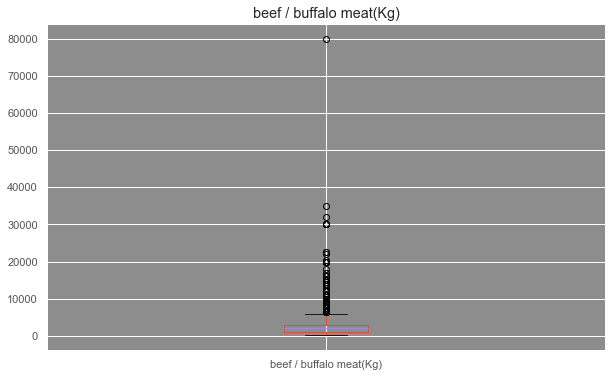

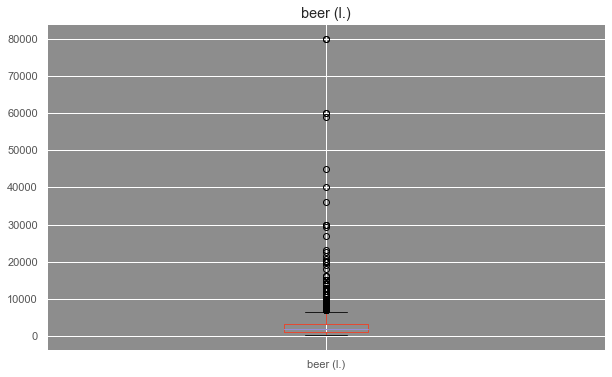

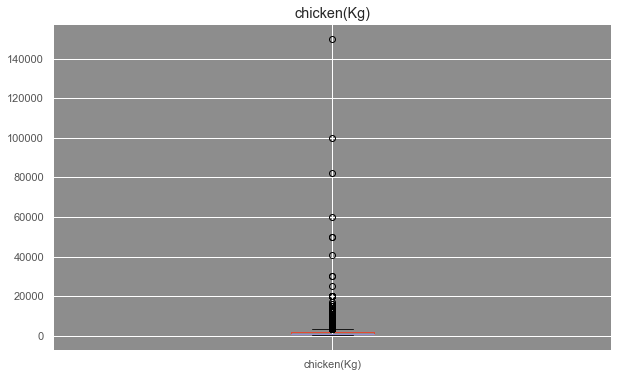

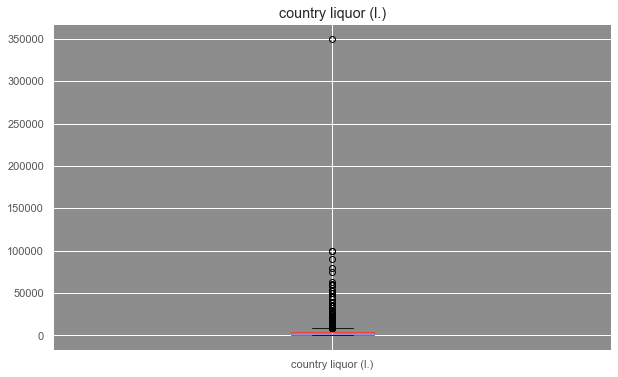

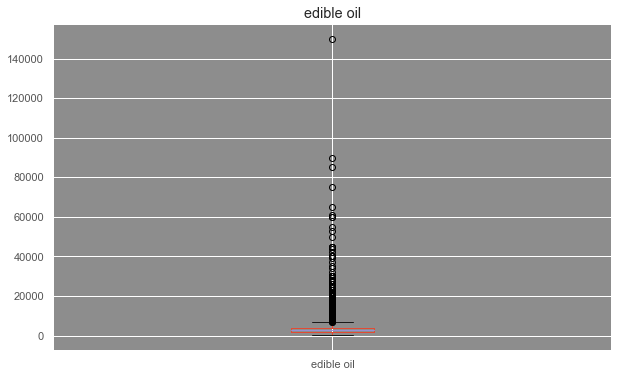

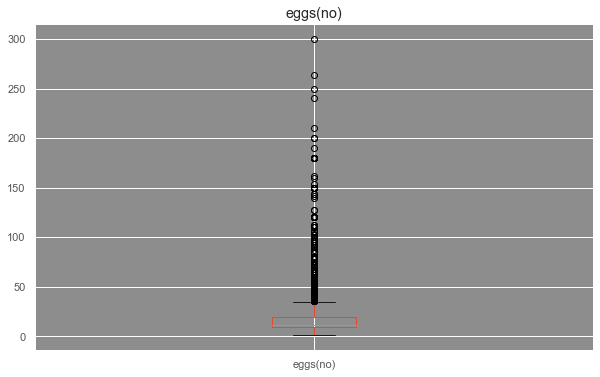

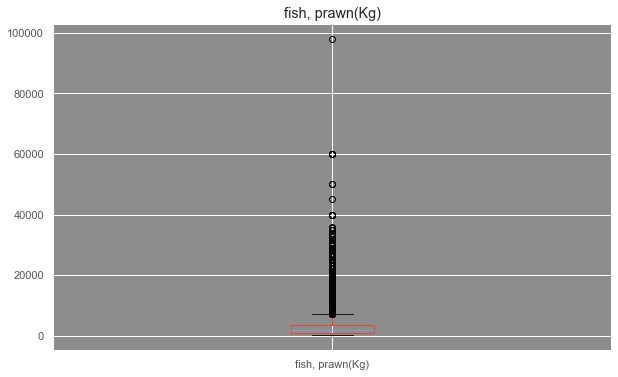

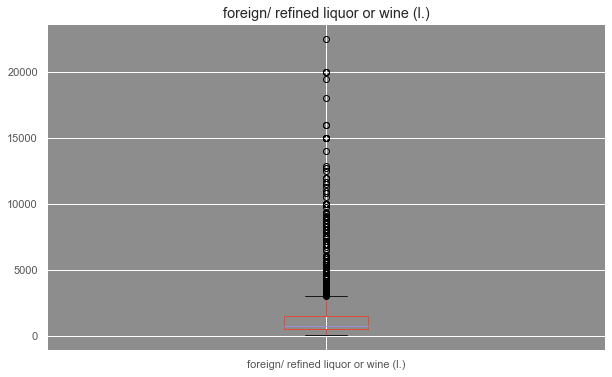

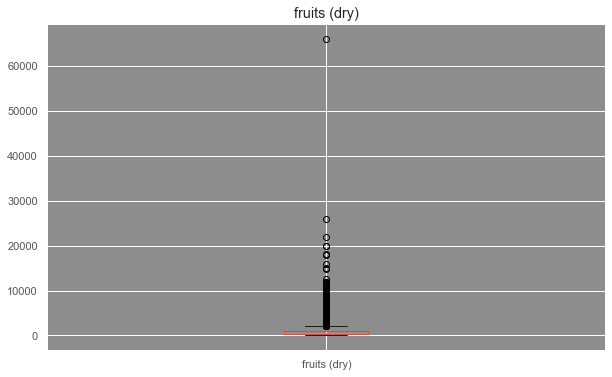

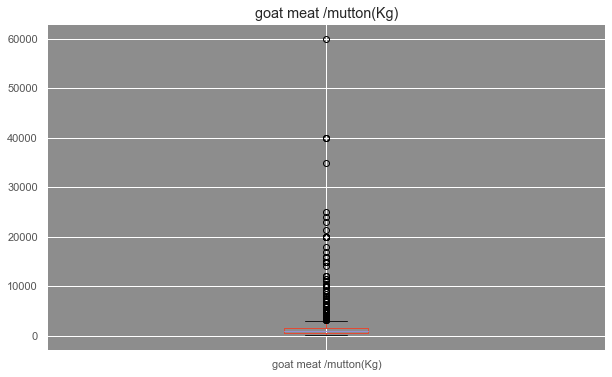

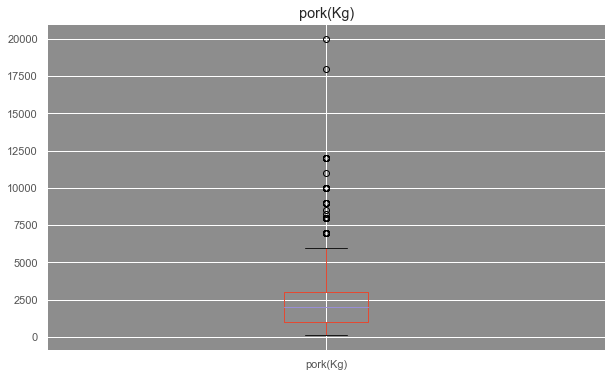

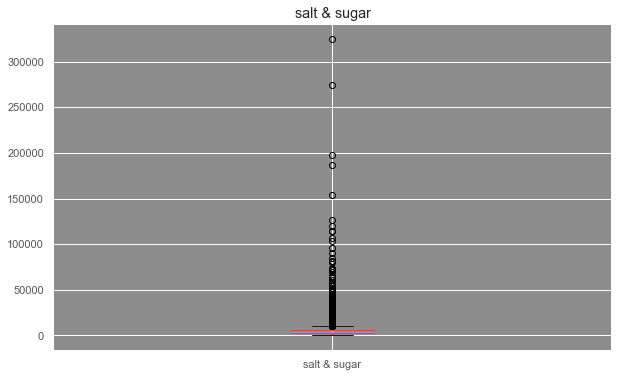

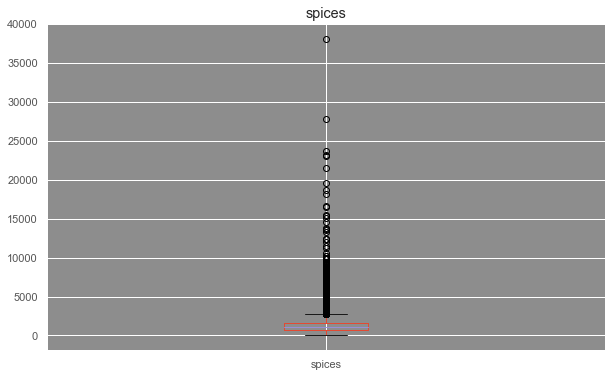

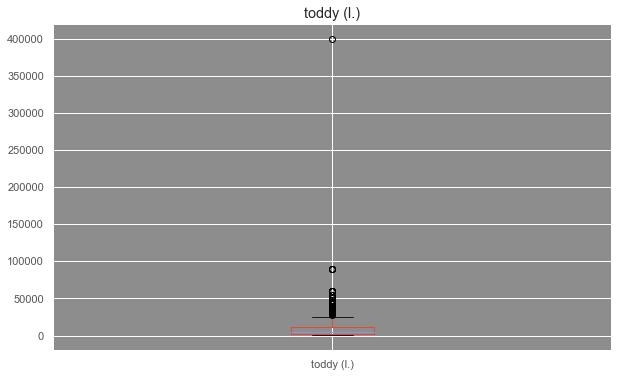

In [101]:
#Check Outliers
num_df = foodpivot2.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    foodpivot2.boxplot(column=[col])
    plt.title(col)

In [102]:
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['Pulses and Pulse Products'] >120000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['beef / buffalo meat(Kg)'] >30000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['beer (l.)'] >30000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['chicken(Kg)'] >30000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['country liquor (l.)'] >150000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['edible oil'] >70000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['eggs(no)'] >180].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['fish, prawn(Kg)'] >40000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['foreign/ refined liquor or wine (l.)'] >12000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['fruits (dry)'] >25000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['goat meat /mutton(Kg)'] >30000].index)
foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['pork(Kg)'] >10000].index)

foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['salt & sugar'] >140000].index)

foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['spices'] >25000].index)

foodpivot2 = foodpivot2.drop(foodpivot2[foodpivot2['toddy (l.)'] >75000].index)

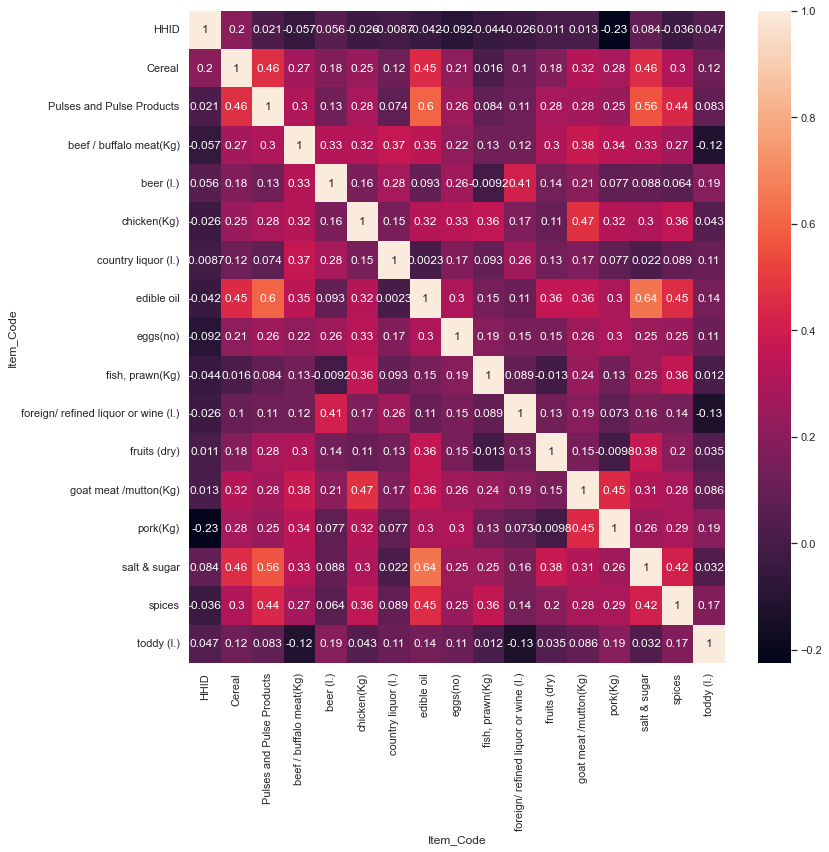

In [103]:
#check collanarity
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(12,12))  
ax =sns.heatmap(foodpivot2.corr(), annot=True)

### merge the two data set on HHID

In [104]:
# MERGE
merge2 = pd.merge(house,foodpivot2, on = 'HHID')
merge2

,HHID,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),goat meat /mutton(Kg),pork(Kg),salt & sugar,spices,toddy (l.)
0,715581201,rural,5,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,119468,46500.0,2500.0,1000.0,NaN,1500.0,3000.0,1000.0,8.0,2300.0,NaN,200.0,NaN,1000.0,5500.0,1100.0,NaN
1,715581202,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,223878,20800.0,1000.0,2000.0,2000.0,2300.0,NaN,900.0,NaN,1500.0,NaN,300.0,NaN,1000.0,4000.0,775.0,NaN
2,715581203,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,198586,22800.0,1000.0,NaN,NaN,1000.0,3000.0,1200.0,20.0,2000.0,NaN,NaN,NaN,1000.0,4000.0,750.0,NaN
3,715581204,rural,1,Islam,Scheduled Tribes,Yes,MEGHALAYA,no,yes,355752,10400.0,750.0,1000.0,NaN,1300.0,3000.0,450.0,NaN,1500.0,NaN,NaN,NaN,1000.0,2000.0,710.0,NaN
4,715581301,rural,6,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,79006,61300.0,2000.0,NaN,NaN,1000.0,3000.0,2050.0,24.0,4000.0,NaN,NaN,NaN,1000.0,5000.0,1400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302,454191104,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,yes,yes,366464,29000.0,2400.0,NaN,NaN,1000.0,NaN,3250.0,25.0,1500.0,NaN,NaN,500.0,NaN,3100.0,2375.0,NaN
99303,454191201,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,no,no,452463,23000.0,2750.0,NaN,NaN,2000.0,NaN,3000.0,22.0,2000.0,NaN,NaN,NaN,NaN,3500.0,1225.0,NaN
99304,454191202,urban,6,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,171808,41000.0,5000.0,NaN,NaN,2500.0,NaN,4250.0,35.0,2000.0,NaN,NaN,NaN,NaN,3500.0,2800.0,NaN
99305,454191203,urban,3,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,223069,34000.0,3000.0,NaN,NaN,1000.0,NaN,3500.0,24.0,2000.0,NaN,NaN,250.0,NaN,3000.0,2450.0,NaN


In [106]:
merge2.shape

(99307, 26)

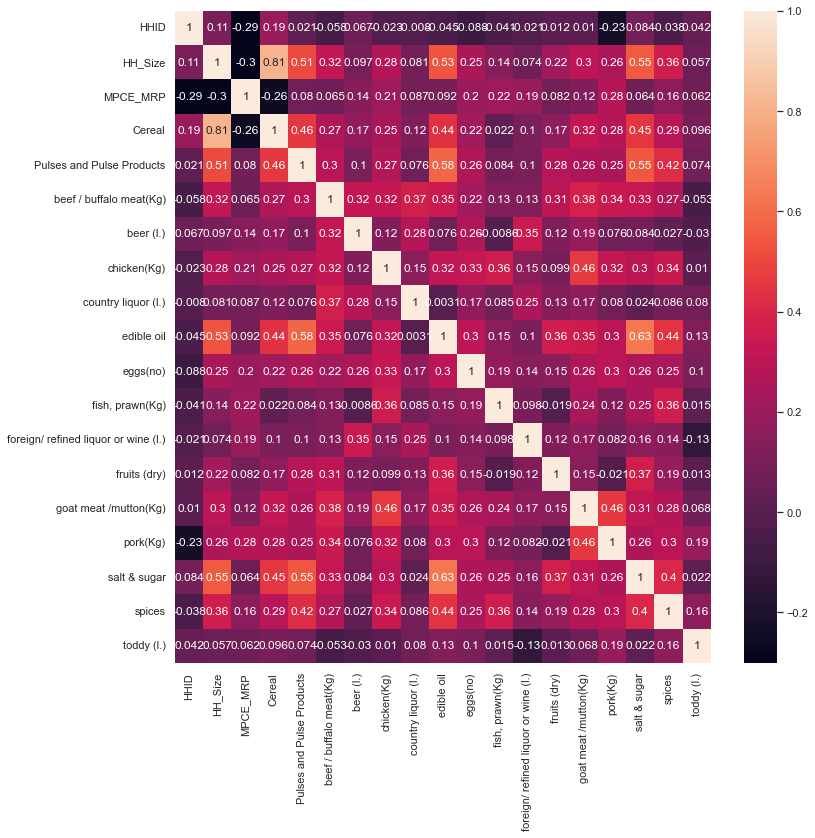

In [108]:
#check collinarity again
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(12,12))  
ax =sns.heatmap(merge2.corr(), annot=True)

In [110]:
##Exporting File
file_url2 = r'C:\Users\Lenovo\Documents\INDE DATA\MERGEQUANTITYFOODHOUSEHOLDNSS68.csv'
merge2.to_csv(file_url2,index = False)
